# Create a model that predicts which passengers survived the Titanic shipwreck

The sinking of the Titanic is one of the famous shipwreks in history. The Titanic sanked in April 15th, 1912 when it collided with a iceburg during voyage. There were about 2224 passengers and crew members during that time and from which only 1502 survived. 
The suvivors were lucky to have been suvived but from the background and other factors some group of people were more likely to have been suvived. For this project we are going to build a model to predict which group of people are more likely to suvive.

This data set is from kaggle: https://www.kaggle.com/c/titanic. 
There is train.csv dataset for the analysis and test.csv dataset to test the results.

The column description is as below.

1. PassengerId = Unique Id of the aboard passengers
2. survival = 1 :survived , 0 : not survived
3. pclass = Class of the Ticket, 1 :1st Class, 2 :2nd Class, 3 :3rd Class
4. sex = Sex
5. Age = Age of the passenger
6. sibsp = No of siblings, spouses aboard 
7. parch = No of parents,children aboard
8. ticket = Ticket number
9. fare = Fare of the ticket
10. cabin = Cabin number
11. embarked = Port of Embarkatio, C: Cherbourg, Q: Queenstown, S: Southampton

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_df= pd.read_csv("test.csv")
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


##  1. Exploratory data analysis

In [4]:
#the column names and the information of the train data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#cheking the columns and rows in datasets
infor_train = train_df.shape
infor_test = test_df.shape

print("There are {} rows and {} columns in train dataset".format(infor_train[0], infor_train[1]))
print("There are {} rows and {} columns in test dataset".format(infor_test[0], infor_test[1]))

There are 891 rows and 12 columns in train dataset
There are 418 rows and 11 columns in test dataset


In [6]:
#Cheking for null values in train dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Cheking for null values in test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#Cheking the median value of the fare column
test_Fare_median = test_df["Fare"].median()
print(test_Fare_median)

14.4542


In [9]:
#Filling the one missing row with the calculated median value
test_df["Fare"].fillna(test_Fare_median,inplace = True)

In [10]:
#Cheking whether its corrected
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Suvived v Fare')

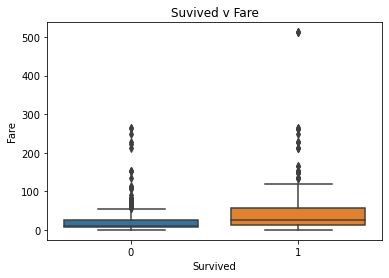

In [11]:
sns.boxplot(x="Survived", y = "Fare", data = train_df).set_title("Suvived v Fare")

Text(0.5, 1.0, 'Suvived v Pclass')

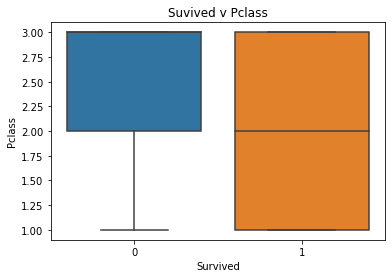

In [12]:
sns.boxplot(x="Survived", y = "Pclass", data = train_df).set_title("Suvived v Pclass")

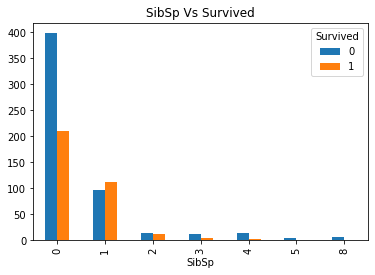

In [13]:
pd.crosstab(train_df['SibSp'], train_df["Survived"]).plot(kind = "bar")
plt.title("SibSp Vs Survived")
plt.show()

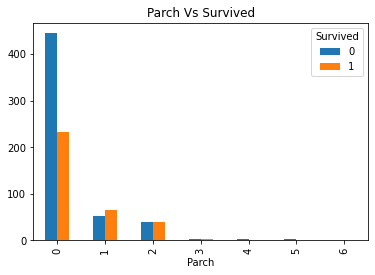

In [14]:
#sns.boxplot(x = "Parch", y = "Survived", data = train_df)
pd.crosstab(train_df.Parch, train_df.Survived).plot(kind = "bar")
plt.title("Parch Vs Survived")
plt.show()

1. From the survived Vs fare box plot we can see that survived were slightly paying higher fare.
2. From the suvived Vs Pclass box plot we can see that all the first class people have been survived and from the 2nd to 3rd class some have survived and some have not.
3. From the bar chart it is shown that passenger survived is low for passengers with no siblings or spouses and only passengers with one sibling or spouse is survival is high.
4. From "Parch Vs Survived", it is also clear that passengers without any parents or children the survival is low. Can conlcude that most of the crew members and workers in the ship didn't survive.

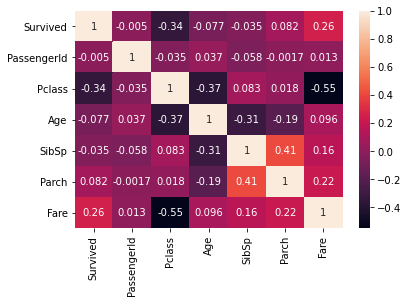

In [15]:
columns = train_df[["Survived","PassengerId","Pclass","Age","SibSp","Parch","Fare"]]
cor_data = columns.corr()
sns.heatmap(cor_data, annot = True)

### To explore the percentage of women vs men who suvived

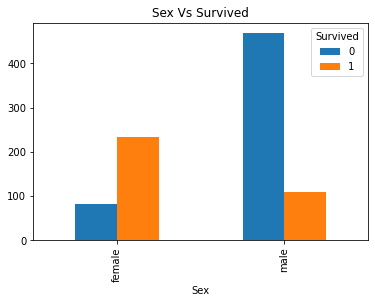

In [16]:
pd.crosstab(train_df.Sex, train_df.Survived).plot(kind = "bar")
plt.title("Sex Vs Survived")
plt.show()

In [17]:
women = train_df[train_df["Sex"]=="female"]["Survived"]
women_rate = sum(women)/len(women)
print("% of women survived :", women_rate)

% of women survived : 0.7420382165605095


In [18]:
men = train_df.loc[train_df.Sex == "male"]["Survived"]
men_rate = sum(men)/len(men)
print("% of men survived :", men_rate)

% of men survived : 0.18890814558058924


From the above results 74% of the women survived and  18.9% of men survived. It is clear from the results that more women survied but it is wrong to predict that suvival is only based on gender since there is 18.9% men who survived. From the gender biased information is it clear that they took only column "Sex" in to consideration.

We are now using Machine Learning Random Forest Model to predict those who survived and who didn't.

## 2. Buildng RandomForestModel to predict the suvivors.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
y = train_df["Survived"]
X = pd.get_dummies(train_df[["Pclass","Sex","SibSp","Parch","Fare"]])
x_test = pd.get_dummies(test_df[["Pclass","Sex","SibSp","Parch","Fare"]])

In [21]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=1)

In [22]:
model.fit(X,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [23]:
predictions = model.predict(x_test)

In [24]:
model.score(x_test, predictions)

1.0

In [25]:
output = pd.DataFrame({'PassengerId' : test_df.PassengerId,'Survived': predictions})

In [26]:
output.to_csv("my_submission.csv",index = False)

## 3. Building DecisionTree model to predict the survivors

In [27]:
#assigning train_df dataframe to a new df
df = train_df.copy()

In [28]:
#removing the "Survived" column from the data frame and assiging to inputs
inputs = df.drop(["Survived"], axis = 1)

#assign the "Survived" column to target
target = df["Survived"]

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [31]:
le_pclass = LabelEncoder()
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_fare = LabelEncoder()

In [32]:
inputs["le_pclass"] = le_pclass.fit_transform(inputs["Pclass"])
inputs["le_sex"] = le_pclass.fit_transform(inputs["Sex"])
inputs["le_age"] = le_pclass.fit_transform(inputs["Age"])
inputs["le_fare"] = le_pclass.fit_transform(inputs["Fare"])

In [33]:
inputs.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,le_pclass,le_sex,le_age,le_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,28,18
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,51,207
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,34,41


In [34]:
#dropping the other columns
inputs_n = inputs.drop(["PassengerId","Pclass","Name","Sex","Age","SibSp","Ticket","Fare","Cabin","Embarked","Parch"], axis = 1)
inputs_n.head(5)

,le_pclass,le_sex,le_age,le_fare
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43


In [35]:
from sklearn import tree

In [36]:
model_2 = tree.DecisionTreeClassifier()

In [37]:
model_2.fit(inputs_n, target)

DecisionTreeClassifier()

In [38]:
model_2.score(inputs_n, target)

0.9876543209876543

In [39]:
model_2.predict([[1,0,51,207]])

array([1], dtype=int64)

### Predicting the test data

In [40]:
test = test_df.copy()

In [41]:
le_Pclass = LabelEncoder()
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_fare = LabelEncoder()

In [42]:
test["le_Pclass"] = le_Pclass.fit_transform(test["Pclass"])
test["le_sex"] = le_sex.fit_transform(test["Sex"])
test["le_age"] = le_age.fit_transform(test["Age"])
test["le_fare"] = le_fare.fit_transform(test["Fare"])

In [43]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,le_Pclass,le_sex,le_age,le_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,1,44,24
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,60,5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,74,41


In [44]:
test.drop(["PassengerId","Pclass","Name","Sex","Age","SibSp","Ticket","Fare","Cabin","Embarked","Parch"], axis = 1, inplace = True)

In [45]:
test_predicted = model_2.predict(test)

In [46]:
model_2.score(test, test_predicted)

1.0

In [47]:
#create a new df as new_test_df and save the predicted results to a columns as "Survived"
test_submission = pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived': test_predicted})

In [48]:
#save the test results to test_submission
test_submission.to_csv("test_submission.csv", index = False)

## 3. Conclusion

Using Random Forest model has been build succefuly to predit the survival of the passengers uing columns Pclass, Sex, SibSp, Parch, Fare. The output result is saved to my_submission.
The score of the model is 1 Random Forest model and Desicion Tree for test data.